In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('train.csv')
import re

In [15]:
df.shape
df = df.drop_duplicates(keep='first')

In [16]:
encoder = LabelEncoder()
df['Is_Response'] = encoder.fit_transform(df['Is_Response'])

In [17]:
df.describe()
df.shape

(38932, 5)

In [18]:
df.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [19]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [20]:
def get_importantFeatures(sent):
    
    sent = sent.lower()
    sent = re.sub('\W+',' ', sent)
    
    return sent

In [21]:
df['imp_features'] = df['Description'].apply(get_importantFeatures)

In [22]:
df

,Description,Is_Response,imp_features
0,The room was kind of clean but had a VERY stro...,1,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,1,i stayed at the crown plaza april april the st...
2,I booked this hotel through Hotwire at the low...,1,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,0,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,1,my girlfriends and i stayed here to celebrate ...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,0,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,1,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,1,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,1,the experience was just ok we paid extra for a...


In [23]:
from sklearn.model_selection import train_test_split

x = df.imp_features
y = df.Is_Response

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29199,)
(9733,)
(29199,)
(9733,)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


In [33]:
vector = TfidfVectorizer()
logis_reg = LogisticRegression(solver = "lbfgs")
model = Pipeline([('vectorizer',vector),('classifier',logis_reg)])
model.fit(x_train, y_train)


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [34]:
pred = model.predict(x_test)

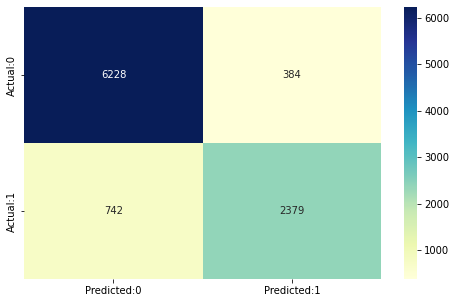

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm=confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [36]:
print(accuracy_score(y_test,pred))

0.8843111065447447
